# 공공데이터 상권정보 분석

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns


In [162]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
%matplotlib inline

In [163]:
# 폰트가 선명하게 보이기 위해
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\alsgu\AppData\Local\Temp/ipykernel_29936/53889745.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## 데이터 로드

In [164]:
df= pd.read_csv('./data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', encoding='cp949')
df.shape

(91335, 39)

In [165]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4.130000e+24,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1.170000e+24,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4.0,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4.140000e+24,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2.650000e+24,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5.0,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4.150000e+24,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1.0,NaN,127.095522,37.323528


In [166]:
df.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
54308,24576543,원당오케이마취통증의학과의원,NaN,S,의료,S01,병원,S01B02,일반병원,Q86102,...,4.130000e+24,문화빌딩,경기도 고양시 덕양구 호국로 783,412812.0,10461.0,NaN,NaN,201.0,126.835584,37.656389


## 데이터 요약

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

## 칼럼명 보기

In [168]:
len(df.columns)

39

In [169]:
# 데이터 타입 확인
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

In [170]:
# 결측치 확인
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47346
호정보          75898
경도               0
위도               0
dtype: int64

<AxesSubplot:>

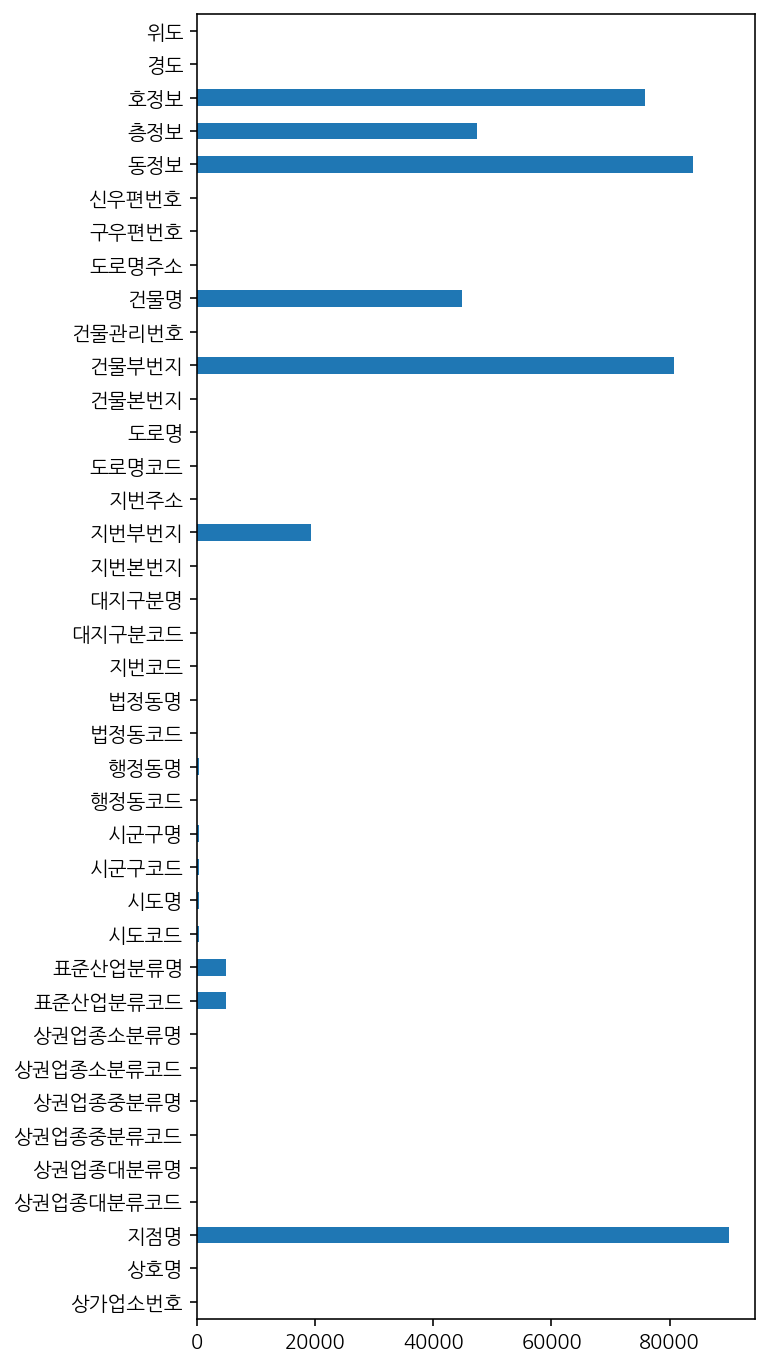

In [171]:
# 결측치 그래프로 확인
a =df.isnull().sum()
a.plot.barh(figsize = (5,12))

In [172]:
b = a.reset_index()
b.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [173]:
b.columns = ['컬럼명','결측치 수']

In [174]:
b.head()

,컬럼명,결측치 수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [175]:
b = b.sort_values(by='결측치 수', ascending=False).reset_index(drop=True)
b

,컬럼명,결측치 수
0,지점명,89989
1,동정보,83929
2,건물부번지,80731
3,호정보,75898
4,층정보,47346
5,건물명,44882
6,지번부번지,19256
7,표준산업분류코드,4922
8,표준산업분류명,4922
9,시도코드,379


In [176]:
c = b.head(10)
c = c['컬럼명'].tolist()

In [177]:
c

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [178]:
# 결측치 제거
df = df.drop(c, axis=1)
df

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19956873,하나산부인과,S,의료,S01,병원,S01B10,산부인과,경기도,41273.0,...,경기도 안산시 단원구 선부동 1081,4.130000e+11,경기도 안산시 단원구 달미로,10,4.130000e+24,경기도 안산시 단원구 달미로 10,425764.0,15236.0,126.814295,37.336344
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,서울특별시,11680.0,...,서울특별시 강남구 도곡동 467-14,1.170000e+11,서울특별시 강남구 언주로30길,39,1.170000e+24,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
2,20152277,조정현신경외과의원,S,의료,S01,병원,S01B15,신경외과,경기도,41390.0,...,경기도 시흥시 정왕동 1740-1,4.140000e+11,경기도 시흥시 중심상가로,178,4.140000e+24,경기도 시흥시 중심상가로 178,429450.0,15066.0,126.734841,37.344955
3,20350610,한귀원정신과의원,S,의료,S01,병원,S01B99,기타병원,부산광역시,26500.0,...,부산광역시 수영구 광안동 74-1,2.650000e+11,부산광역시 수영구 수영로,688,2.650000e+24,부산광역시 수영구 수영로 688,613100.0,48266.0,129.115438,35.166872
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,4.150000e+11,경기도 용인시 수지구 문정로,32,4.150000e+24,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,16196725,온누리약국,S,의료,S02,약국/한약방,S02A01,약국,대전광역시,30170.0,...,대전광역시 서구 둔산동 1507,3.020000e+11,대전광역시 서구 문예로,67,3.020000e+24,대전광역시 서구 문예로 67,302831.0,35240.0,127.389865,36.352728
91331,16192180,리원,S,의료,S07,의료관련서비스업,S07A07,산후조리원,경기도,41281.0,...,경기도 고양시 덕양구 화정동 1146,4.130000e+11,경기도 고양시 덕양구 성신로,14,4.130000e+24,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,126.830144,37.627530
91332,16127538,참좋은요양병원,S,의료,S01,병원,S01B17,노인/치매병원,부산광역시,26410.0,...,부산광역시 금정구 장전동 538-1,2.640000e+11,부산광역시 금정구 금강로,209,2.640000e+24,부산광역시 금정구 금강로 209,609841.0,46294.0,129.082790,35.227138
91333,16108681,경희중앙한의원,S,의료,S01,병원,S01B06,한의원,서울특별시,11740.0,...,서울특별시 강동구 길동 345-9,1.170000e+11,서울특별시 강동구 천중로,213,1.170000e+24,서울특별시 강동구 천중로 213,134811.0,5303.0,127.143958,37.540993


In [179]:
df.shape

(91335, 29)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  float64
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 통계

In [181]:
#평균
df['위도'].mean()

36.62471119236065

In [182]:
# 중앙값
df['위도'].median()

37.23465232

In [183]:
# 최댓값
df['위도'].max()

38.49965857

In [184]:
# 최솟값
df['위도'].min()

33.21928967

In [185]:
# 갯수
len(df['위도'])

91335

In [186]:
# 갯수
df['위도'].count()

91335

In [187]:
df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [188]:
df[['위도','경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084551
75%,37.507463,128.108919
max,38.499659,130.909912


In [189]:
df.describe()

,상가업소번호,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,도로명코드,건물본번지,건물관리번호,구우편번호,신우편번호,경도,위도
count,9.133500e+04,90956.000000,9.133500e+04,9.128000e+04,9.133500e+04,91335.000000,91335.000000,9.133500e+04,91335.000000,9.133500e+04,91323.000000,91333.00000,91335.000000,91335.000000
mean,2.121818e+07,32898.381877,3.293232e+09,3.293385e+09,3.293350e+18,1.001336,587.534549,3.293345e+11,251.200482,3.295158e+24,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,12985.393171,1.297387e+09,1.297706e+09,1.297268e+18,0.036524,582.519364,1.297263e+11,477.456487,1.298360e+24,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,11110.000000,1.111052e+09,1.111010e+09,1.110000e+18,1.000000,1.000000,1.110000e+11,0.000000,1.110000e+24,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,26350.000000,2.635065e+09,2.635011e+09,2.640000e+18,1.000000,162.000000,2.640000e+11,29.000000,2.640000e+24,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,41117.000000,4.111758e+09,4.111710e+09,4.110000e+18,1.000000,462.000000,4.110000e+11,92.000000,4.110000e+24,440300.000000,24353.00000,127.084551,37.234652
75%,2.480984e+07,43113.000000,4.311370e+09,4.311311e+09,4.310000e+18,1.000000,858.000000,4.310000e+11,257.000000,4.310000e+24,602811.000000,46044.00000,128.108919,37.507463
max,2.852470e+07,50130.000000,5.013061e+09,5.013032e+09,5.010000e+18,2.000000,7338.000000,5.010000e+11,8795.000000,5.010000e+24,799801.000000,63643.00000,130.909912,38.499659


In [190]:
df.describe(include='object')

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335
unique,56908,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198


## 중복 제거

In [191]:
df['상권업종대분류명']

0        의료
1        의료
2        의료
3        의료
4        의료
         ..
91330    의료
91331    의료
91332    의료
91333    의료
91334    의료
Name: 상권업종대분류명, Length: 91335, dtype: object

In [192]:
df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [193]:
df['상권업종대분류명'].nunique()

1

In [194]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [195]:
df['상권업종소분류명'].nunique()

34

## 요약값 확인

In [196]:
df['시도명']

0          경기도
1        서울특별시
2          경기도
3        부산광역시
4          경기도
         ...  
91330    대전광역시
91331      경기도
91332    부산광역시
91333    서울특별시
91334     충청남도
Name: 시도명, Length: 91335, dtype: object

In [197]:
df['시도명'].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [198]:
df['시도명'].value_counts(normalize=True)

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

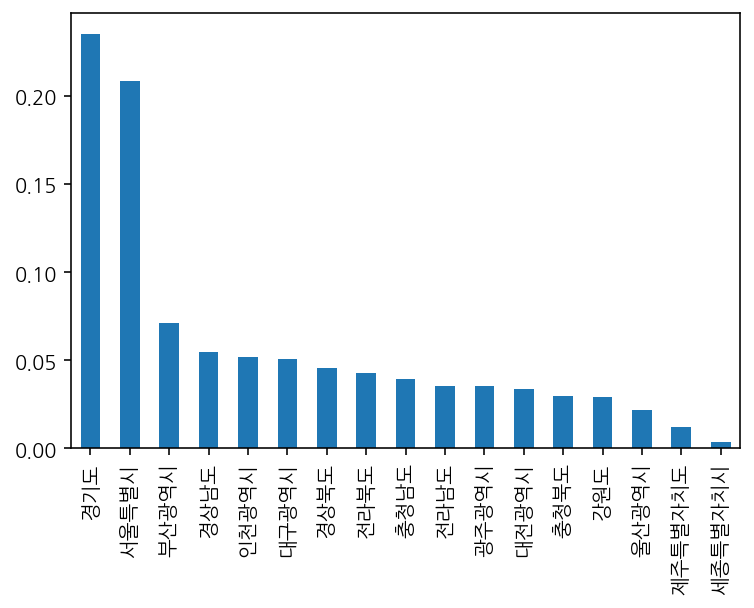

In [199]:
city = df['시도명'].value_counts(normalize=True)
city.plot.bar()
plt.show()

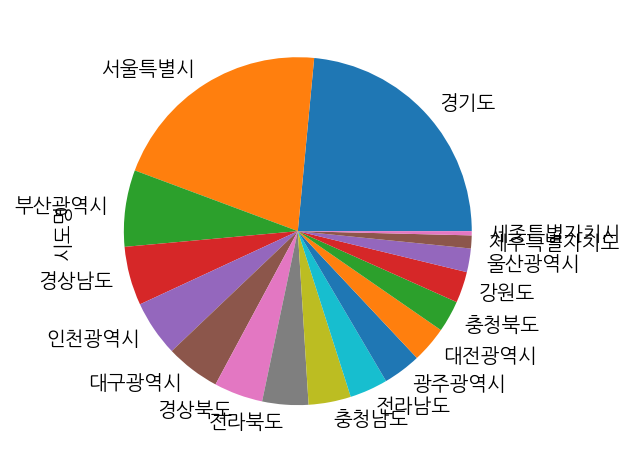

In [200]:
city2 = df['시도명'].value_counts()
city2.plot.pie()
plt.show()

## seaborn 활용

<AxesSubplot:xlabel='count', ylabel='시도명'>

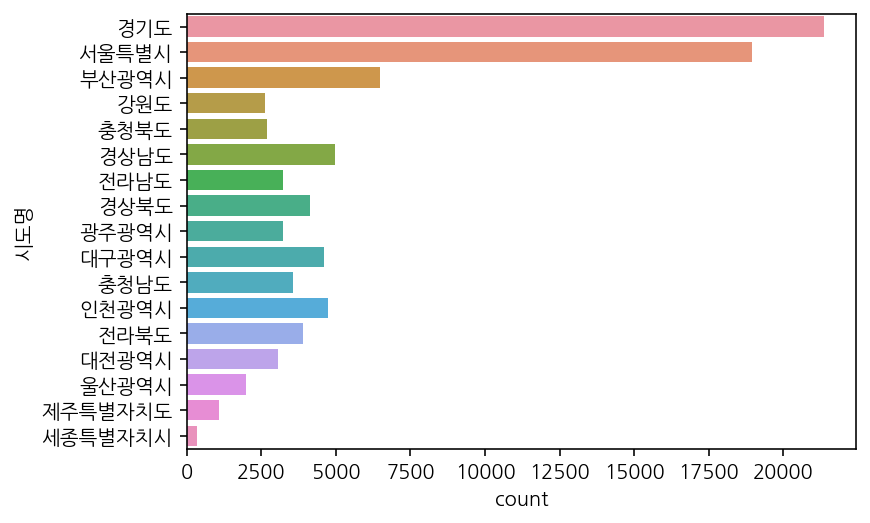

In [201]:
sns.countplot(data = df, y='시도명')

<AxesSubplot:xlabel='상권업종중분류명', ylabel='count'>

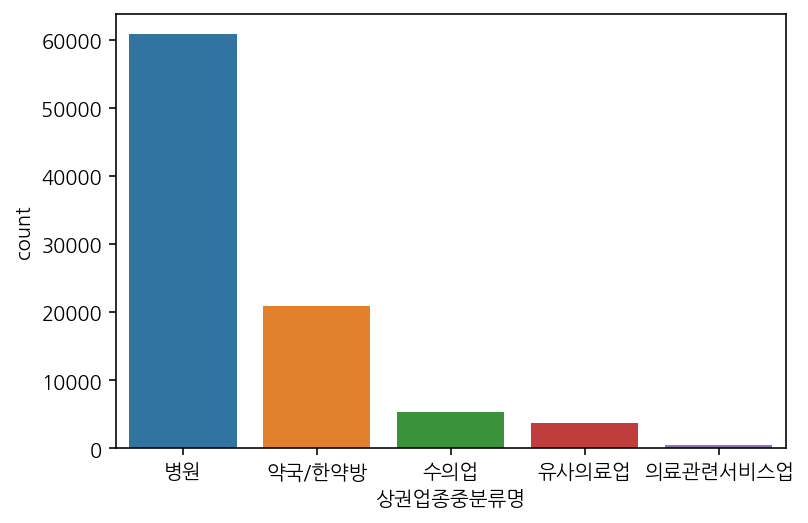

In [202]:
sns.countplot(data=df, x='상권업종중분류명')

## 데이터 색인하기

In [203]:
# 약국/한약방만 가져오기
df['상권업종중분류명'] =='약국/한약방'

0        False
1        False
2        False
3        False
4         True
         ...  
91330     True
91331    False
91332    False
91333    False
91334    False
Name: 상권업종중분류명, Length: 91335, dtype: bool

In [204]:
df_1 = df[df['상권업종중분류명'] =='약국/한약방']

In [205]:
df_1.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,4.150000e+11,경기도 용인시 수지구 문정로,32,4.150000e+24,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,강원도,42110.0,...,강원도 춘천시 중앙로2가 99,4.210000e+11,강원도 춘천시 낙원길,50,4.210000e+24,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,충청북도,43111.0,...,충청북도 청주시 상당구 금천동 187-17,4.310000e+11,충청북도 청주시 상당구 중고개로337번길,134,4.310000e+24,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,경상남도,48890.0,...,경상남도 합천군 용주면 월평리 78-2,4.890000e+11,경상남도 합천군 용주면 월평길,149,4.890000e+24,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,전라남도,46830.0,...,전라남도 영암군 도포면 덕화리 296,4.680000e+11,전라남도 영암군 도포면 인덕길,75,4.680000e+24,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,126.630348,34.834080


In [206]:
# df_2 = df[df['상권업종대분류명'] =='의료']['상권업종중분류명']
df_2 = df.loc[df['상권업종대분류명']=='의료','상권업종중분류명']

In [207]:
df_2

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
           ...   
91330      약국/한약방
91331    의료관련서비스업
91332          병원
91333          병원
91334          병원
Name: 상권업종중분류명, Length: 91335, dtype: object

In [208]:
df_sim = df[df['상권업종중분류명']=='유사의료업']

In [209]:
df_sim

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
22,21013731,세종언어치료센터,S,의료,S03,유사의료업,S03B07,언어치료,부산광역시,26410.0,...,부산광역시 금정구 구서동 84-1,2.640000e+11,부산광역시 금정구 중앙대로,1817,2.640000e+24,부산광역시 금정구 중앙대로 1817-11,609310.0,46273.0,129.091662,35.246528
40,20933900,고려수지침학회,S,의료,S03,유사의료업,S03B03,침구원,경상남도,48123.0,...,경상남도 창원시 성산구 상남동 5-2,4.810000e+11,경상남도 창원시 성산구 마디미로4번길,9,4.810000e+24,경상남도 창원시 성산구 마디미로4번길 9,642832.0,51495.0,128.684678,35.224113
97,21717820,청명원,S,의료,S03,유사의료업,S03B09,유사의료업기타,충청북도,43760.0,...,충청북도 괴산군 청안면 금신리 241,4.380000e+11,충청북도 괴산군 청안면 금신로1길,93,4.380000e+24,충청북도 괴산군 청안면 금신로1길 93,367831.0,28050.0,127.635740,36.768935
102,21865854,응급환자이송센터,S,의료,S03,유사의료업,S03B01,응급구조대,대전광역시,30140.0,...,대전광역시 중구 대사동 248-237,3.010000e+11,대전광역시 중구 계룡로921번길,40,3.010000e+24,대전광역시 중구 계룡로921번길 40,301846.0,34946.0,127.417693,36.321801
108,21914637,태화아동발달지원센터,S,의료,S03,유사의료업,S03B07,언어치료,대전광역시,30140.0,...,대전광역시 중구 문화동 27,3.010000e+11,대전광역시 중구 보문산로333번길,29,3.010000e+24,대전광역시 중구 보문산로333번길 29,301130.0,35020.0,127.412725,36.312953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91300,16131218,으뜸치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,경상남도,48170.0,...,경상남도 진주시 수정동 39-11,4.820000e+11,경상남도 진주시 향교로18번길,8,4.820000e+24,경상남도 진주시 향교로18번길 8,660180.0,52753.0,128.084600,35.197029
91310,16199325,보령치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,서울특별시,11290.0,...,서울특별시 성북구 동소문동4가 103-11,1.130000e+11,서울특별시 성북구 동소문로,47,1.130000e+24,서울특별시 성북구 동소문로 47-15,136821.0,2832.0,127.010602,37.591455
91311,16199088,점프셈교실,S,의료,S03,유사의료업,S03B09,유사의료업기타,경상북도,47130.0,...,경상북도 경주시 황성동 446,4.710000e+11,경상북도 경주시 용담로104번길,16,4.710000e+24,경상북도 경주시 용담로104번길 16,780954.0,38084.0,129.211755,35.865600
91319,16108560,씨앤디자인치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,서울특별시,11545.0,...,서울특별시 금천구 가산동 60-25,1.150000e+11,서울특별시 금천구 벚꽃로,234,1.150000e+24,서울특별시 금천구 벚꽃로 234,153798.0,8513.0,126.886122,37.475986


## 여러조건 색인하기

In [210]:
df['상권업종소분류명'] =='약국'
df['시도명'] =='서울특별시'

0        False
1         True
2        False
3        False
4        False
         ...  
91330    False
91331    False
91332    False
91333     True
91334    False
Name: 시도명, Length: 91335, dtype: bool

In [211]:
df_seoul_drug = df[(df['상권업종소분류명']=='약국') & (df['시도명'] == '서울특별시')]
df_seoul_drug

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,1.170000e+11,서울특별시 강남구 테헤란로,101,1.170000e+24,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11740.0,...,서울특별시 강동구 둔촌동 630,1.170000e+11,서울특별시 강동구 명일로,172,1.170000e+24,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11260.0,...,서울특별시 중랑구 신내동 646,1.130000e+11,서울특별시 중랑구 신내로,211,1.130000e+24,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424
136,22388303,메디팜한솔약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11200.0,...,서울특별시 성동구 행당동 346,1.120000e+11,서울특별시 성동구 행당로,82,1.120000e+24,서울특별시 성동구 행당로 82,133777.0,4717.0,127.027513,37.556238
141,22412563,명약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11230.0,...,서울특별시 동대문구 휘경동 286-121,1.120000e+11,서울특별시 동대문구 망우로18나길,3,1.120000e+24,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,127.060556,37.587349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91239,16131547,우리이웃약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11290.0,...,서울특별시 성북구 종암동 34-3,1.130000e+11,서울특별시 성북구 종암로5길,26,1.130000e+24,서울특별시 성북구 종암로5길 26,136769.0,2811.0,127.033907,37.594792
91275,16195709,더블유스토어,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11530.0,...,서울특별시 구로구 구로동 501,1.150000e+11,서울특별시 구로구 구로중앙로,134,1.150000e+24,서울특별시 구로구 구로중앙로 134,152731.0,8293.0,126.884285,37.499936
91288,16131839,종각팜약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11110.0,...,서울특별시 종로구 종로2가 84-8,1.110000e+11,서울특별시 종로구 종로,68,1.110000e+24,서울특별시 종로구 종로 68,110122.0,3189.0,126.984930,37.569882
91301,16188650,온누리약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11530.0,...,서울특별시 구로구 구로동 798-30,1.150000e+11,서울특별시 구로구 디지털로27길,116,1.150000e+24,서울특별시 구로구 디지털로27길 116,152875.0,8374.0,126.888070,37.484897


## 구별로 보기

In [212]:
c = df_seoul_drug['시군구명'].value_counts(normalize=True)
c

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
노원구     0.047220
성북구     0.044705
은평구     0.042191
영등포구    0.040514
강서구     0.037999
마포구     0.037999
중랑구     0.036044
서대문구    0.033529
관악구     0.032970
강동구     0.032691
종로구     0.031014
양천구     0.030455
중구      0.029617
강북구     0.029058
구로구     0.028500
동작구     0.026823
성동구     0.024588
용산구     0.024308
금천구     0.023750
도봉구     0.023470
Name: 시군구명, dtype: float64

<AxesSubplot:>

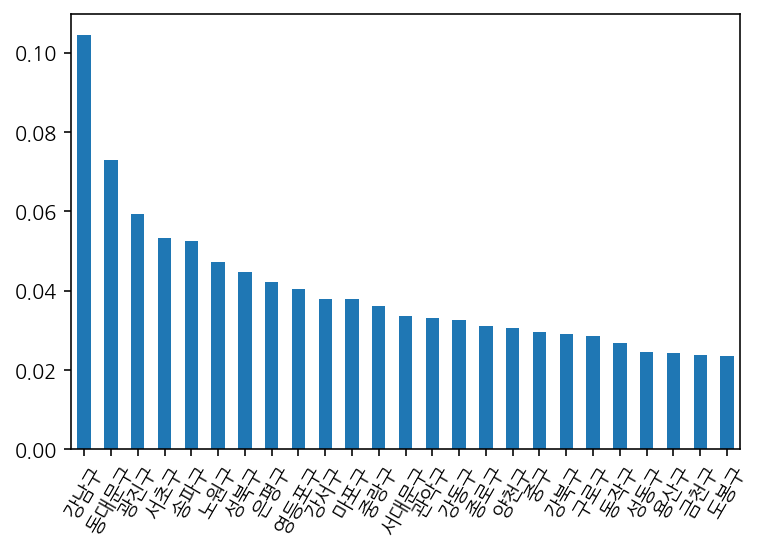

In [213]:
c.plot.bar(rot = 60)

In [214]:
# 서울특별시 종합병원
df_hospital_seoul = df[(df['상권업종소분류명']=='종합병원') & (df['시도명']=='서울특별시')].copy()
df_hospital_seoul

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,...,서울특별시 광진구 중곡동 58-25,1.120000e+11,서울특별시 광진구 긴고랑로,119,1.120000e+24,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,서울특별시,11470.0,...,서울특별시 양천구 신정동 897-13,1.150000e+11,서울특별시 양천구 국회대로,250,1.150000e+24,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213
385,20737057,SNUH,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,...,서울특별시 강남구 역삼동 736-55,1.170000e+11,서울특별시 강남구 테헤란로26길,10,1.170000e+24,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 여의도동 62,1.160000e+11,서울특별시 영등포구 63로,10,1.160000e+24,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296
2461,20024045,한양,S,의료,S01,병원,S01B01,종합병원,서울특별시,11200.0,...,서울특별시 성동구 행당동 15-1,1.120000e+11,서울특별시 성동구 마조로,22,1.120000e+24,서울특별시 성동구 마조로 22-2,133070.0,4763.0,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 505,1.170000e+11,서울특별시 서초구 반포대로,222,1.170000e+24,서울특별시 서초구 반포대로 222,137701.0,6591.0,127.005841,37.502382
76508,12292992,라마르의원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11740.0,...,서울특별시 강동구 천호동 453-8,1.170000e+11,서울특별시 강동구 천호대로157길,18,1.170000e+24,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11140.0,...,서울특별시 중구 명동2가 1-1,1.110000e+11,서울특별시 중구 명동길,74,1.110000e+24,서울특별시 중구 명동길 74,100809.0,4537.0,126.986758,37.563662
90581,16332576,씨엠병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 영등포동4가 90,1.160000e+11,서울특별시 영등포구 영등포로36길,13,1.160000e+24,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,126.903857,37.518807


In [215]:
df_hospital_seoul['시군구명'].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

## 텍스트 데이터 색인

In [216]:
df_hospital_seoul['상호명'].str.contains('종합병원')

305      False
353      False
385      False
1917     False
2461     False
         ...  
71991    False
76508    False
90492    False
90581    False
90788    False
Name: 상호명, Length: 91, dtype: bool

In [217]:
# 종합병원이 안들어간것
~df_hospital_seoul['상호명'].str.contains('종합병원')

305      True
353      True
385      True
1917     True
2461     True
         ... 
71991    True
76508    True
90492    True
90581    True
90788    True
Name: 상호명, Length: 91, dtype: bool

In [218]:
drop_row = df_hospital_seoul[df_hospital_seoul['상호명'].str.contains('꽃배달|의료기|장례식장|상담소|어린이집')].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [219]:
drop_row2 = df_hospital_seoul[df_hospital_seoul['상호명'].str.contains('의원')].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [220]:
drop_row = drop_row+drop_row2

In [221]:
len(drop_row)

33

In [222]:
df_hospital_seoul = df_hospital_seoul.drop(drop_row, axis=0)
print(df_hospital_seoul.shape)

(58, 29)


<AxesSubplot:>

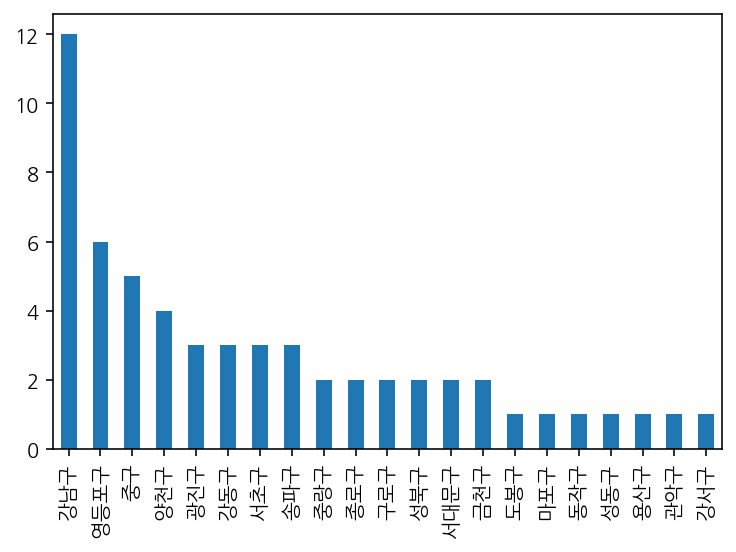

In [223]:
df_hospital_seoul['시군구명'].value_counts().plot.bar()

<AxesSubplot:xlabel='시군구명', ylabel='count'>

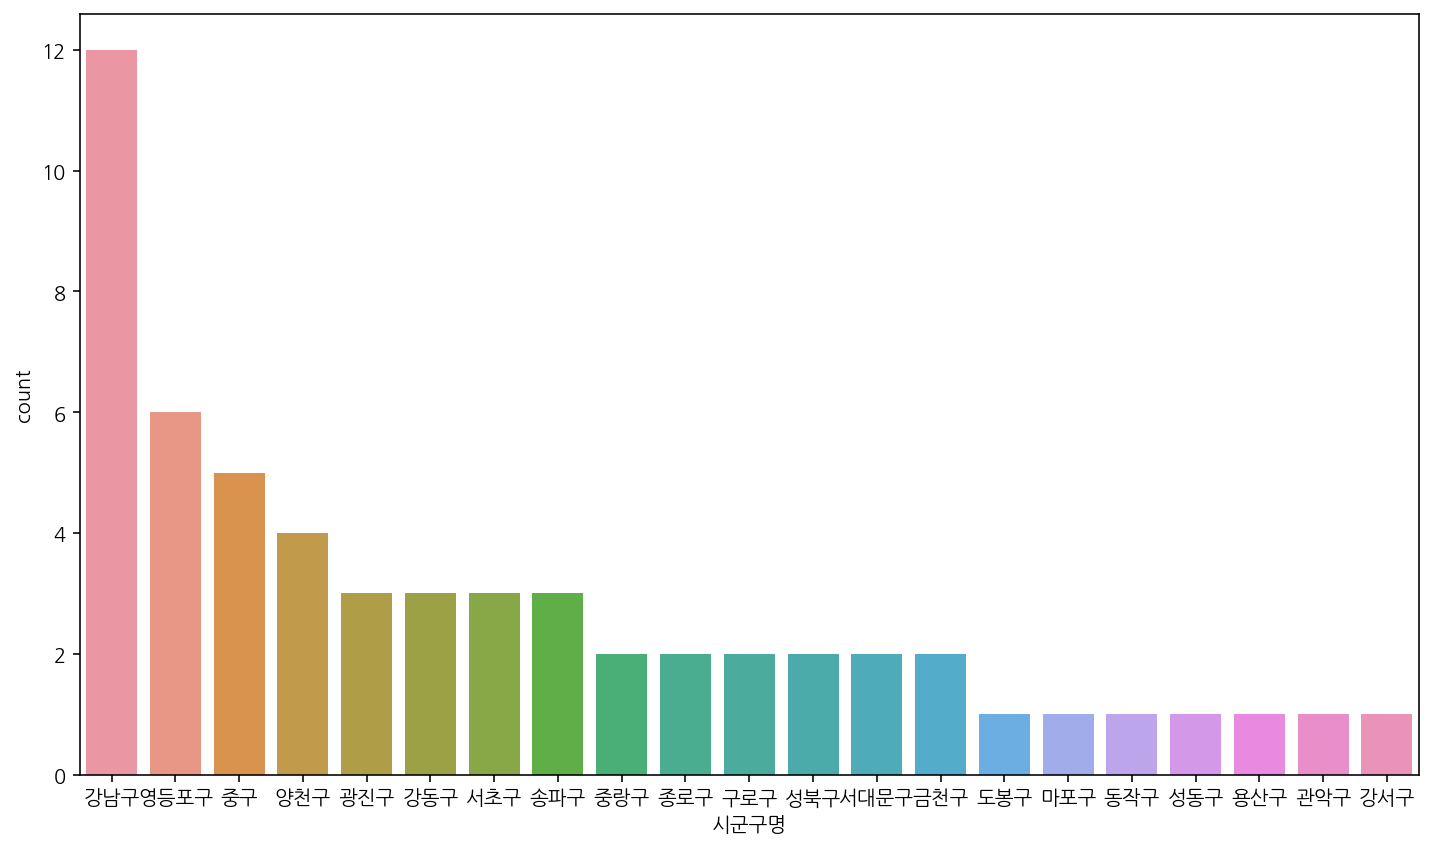

In [224]:
plt.figure(figsize=(12,7))
sns.countplot(data=df_hospital_seoul, x='시군구명', order=df_hospital_seoul['시군구명'].value_counts().index)

## 특정지역만 보기

In [225]:
df_seoul = df[df['시도명'] =='서울특별시'].copy()

In [226]:
df_seoul.shape

(18943, 29)

In [227]:
df_seoul['시군구명'].value_counts()

강남구     3120
서초구     1491
동대문구    1152
송파구     1021
광진구      935
강서구      799
노원구      741
은평구      739
영등포구     731
성북구      708
강동구      703
마포구      649
관악구      578
중구       576
양천구      574
서대문구     543
중랑구      497
종로구      492
동작구      489
성동구      482
구로구      451
도봉구      412
강북구      396
용산구      361
금천구      303
Name: 시군구명, dtype: int64

<AxesSubplot:xlabel='시군구명', ylabel='count'>

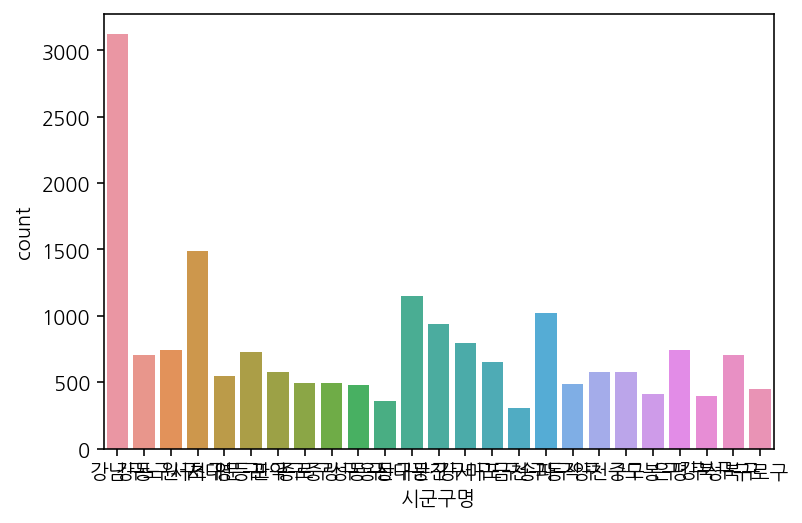

In [228]:
sns.countplot(data=df_seoul, x='시군구명')

<AxesSubplot:xlabel='경도', ylabel='위도'>

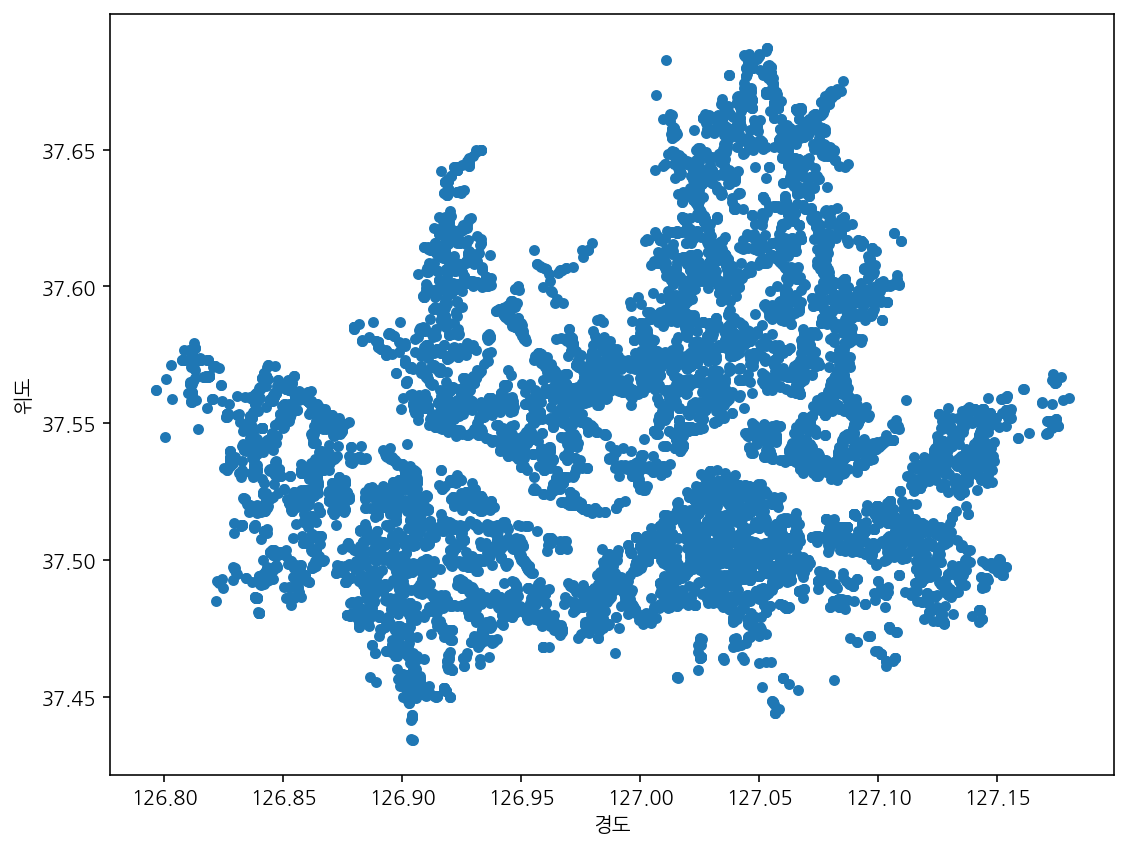

In [229]:
# 위경도 시각화 pandas 활용
df_seoul[['경도','위도','시군구명']].plot.scatter(x = '경도',y='위도', figsize=(9,7))

<AxesSubplot:xlabel='위도', ylabel='경도'>

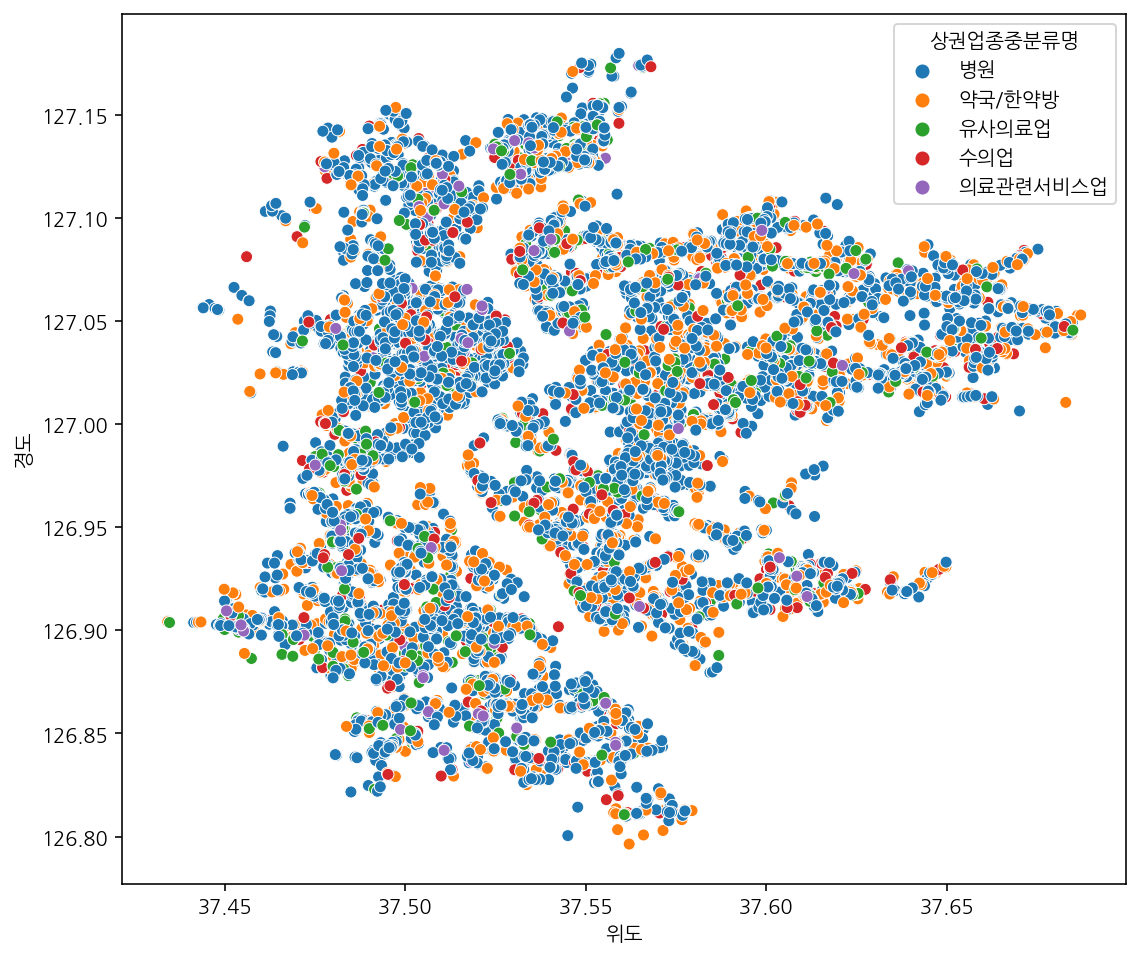

In [230]:
# seaborn 사용
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul, x='위도',y='경도', hue='상권업종중분류명')

<AxesSubplot:xlabel='경도', ylabel='위도'>

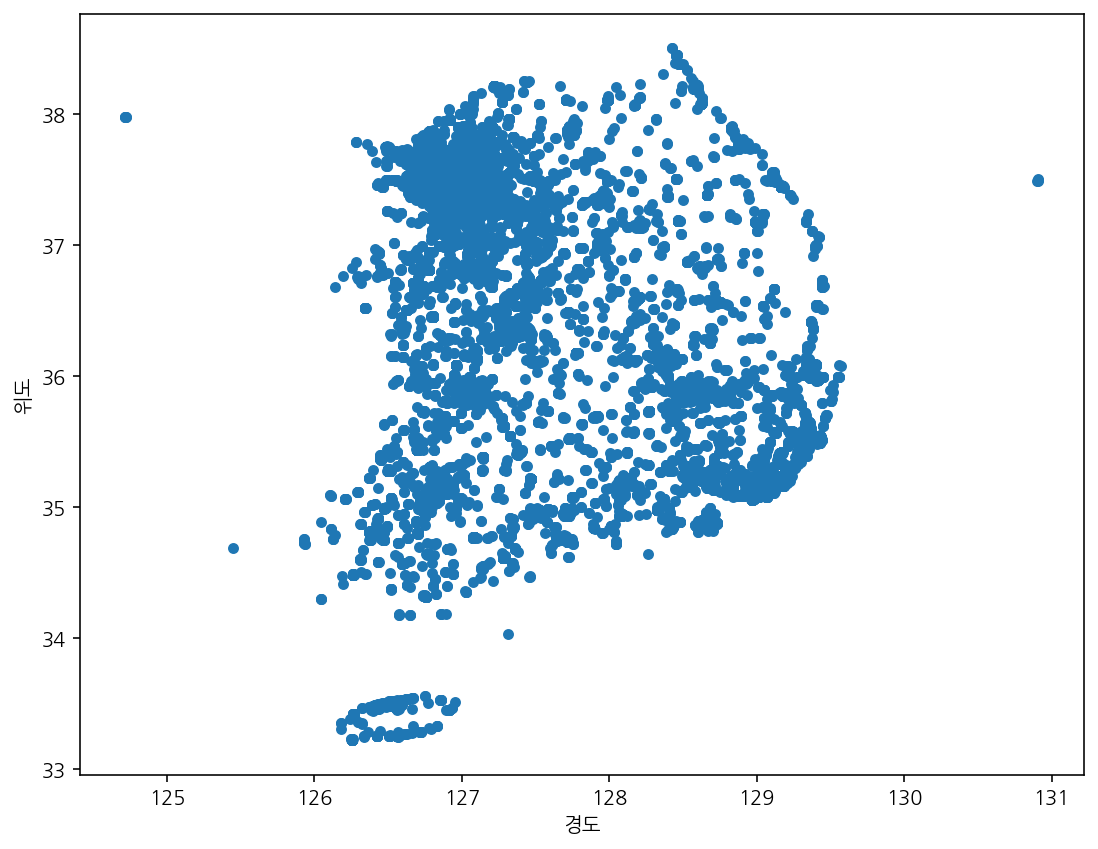

In [231]:
# 위경도 시각화 pandas 활용
df[['경도','위도','시군구명']].plot.scatter(x = '경도',y='위도', figsize=(9,7))

<AxesSubplot:xlabel='경도', ylabel='위도'>

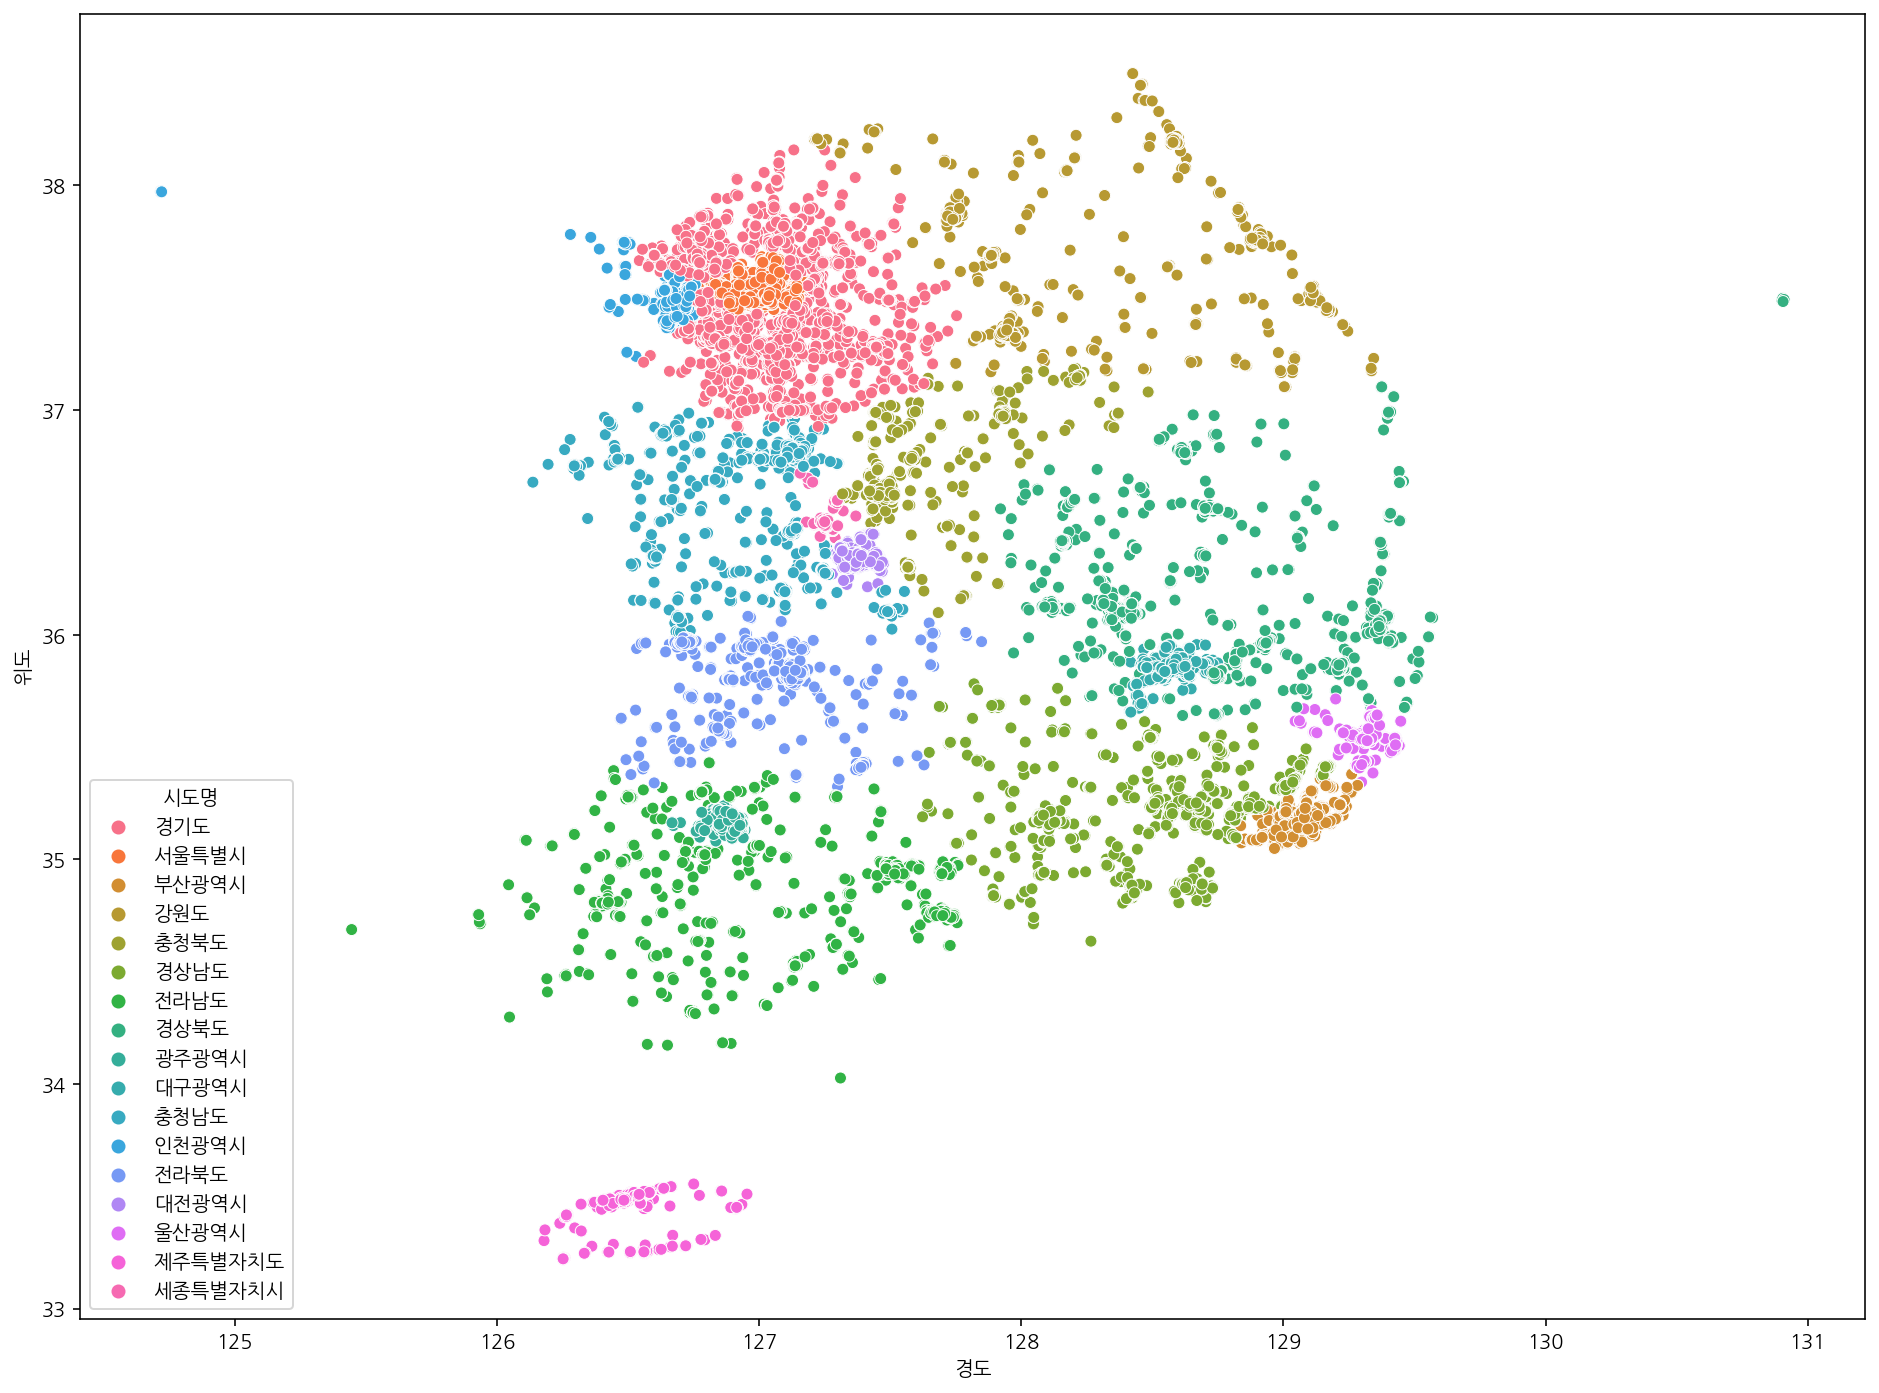

In [232]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=df, x='경도',y='위도', hue='시도명')

In [233]:
import folium

In [234]:
m = folium.Map()
m

In [235]:
a = df_hospital_seoul['위도'].mean()
b = df_hospital_seoul['경도'].mean()

In [236]:
m = folium.Map(location=[a,b])

In [237]:
m

In [238]:
for n in df_hospital_seoul.index:
    name = df_hospital_seoul.loc[n,'상호명']
    location = [df_hospital_seoul.loc[n,'위도'],df_hospital_seoul.loc[n,'경도']]
    address = df_hospital_seoul.loc[n, '도로명주소']
    popup = f"{name} - {address}"
    folium.Marker(
        location = location,
        popup=popup).add_to(m)
m